# DISEÑO DEL PROYECTO

En este caso estaremos trabajando para una compañía de generación de energía solar fotovoltaica.

Han detectado comportamientos anómalos en 2 de las plantas y la subcontrata de mantenimiento no es capaz de identificar el motivo.

Antes de desplazar a un equipo de ingenieros nos piden al equipo de data science que analicemos los datos de los sensores y medidores para ver si podemos detectar el problema.

En este caso entre otras cosas vamos a aprender:

* cómo funcionan este tipo de plantas solares
* análisis a realizar en datasets donde la variable tiempo tiene mucha importancia
* cómo enfocar el análisis en proyectos donde los datos son recogidos por sensores o medidores

Por tanto, mucho de lo que aprendamos aquí es de aplicación general en proyectos de industria e IoT:

* análisis de producción en fábricas
* otros tipos de energía
* smart cities
* IoT en agricultura
* etc.


## OBJETIVO

Analizar los datos disponibles para intentar intuir donde pueden estar los problemas y si es necesario desplazar o no a un equipo de ingenieros a las plantas.

## PALANCAS

En este tipo de proyectos en el que hay un proceso claro la parte más IMPORTANTE es conocer y entender ese proceso.

Vamos a ver por ejemplo cómo en este caso, que parece a priori fácil por la aparente sencillez de los datos, si no hacemos un diseño del proyecto guiado por el proceso, nos podríamos meter en un bucle infinito de análisis sin llegar a ningún lado.

Una vez entendido cómo funciona el negocio y el proceso las palancas nos van a salir solas.

**¿Cómo funciona una planta de energía solar fotovoltaica?**

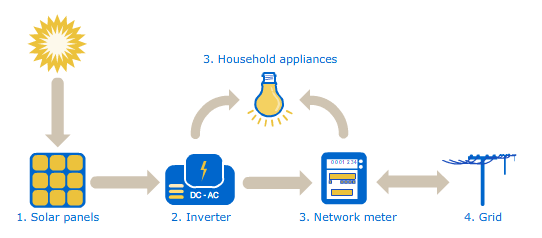

In [4]:
from IPython import display
display.Image("../../../99_Media/How_Solar_Power_Works.png")

Fuente del gráfico: https://upload.wikimedia.org/wikipedia/commons/b/bb/How_Solar_Power_Works.png

Por tanto las palancas que influyen sobre el objetivo de negocio (en este caso generar corriente AC) son:

1. **Irradiación**: a mayor irradiación mayor DC generada. Pero no es monotónica, a partir de ciertos valores mayor temperatura puede mermar la capacidad de generación
2. **Estado de los paneles**: deben estar limpios y con un correcto funcionamiento para generar la mayor energía DC posible
3. **Eficiencia de los inverters**: siempre hay una pérdida en la transformación de DC a AC, pero debe ser la mínima posible. También deben estar en correcto estado y funcionamiento.
4. **Medidores y sensores**: si se estropean y no miden bien perdemos la trazabilidad y la posibilidad de detectar fallos

## KPIs

* Irradiación: mide la energía solar que llega
* Temperatura ambiente y del módulo: medida por los sensores de la planta en grados Celsius
* Potencia DC: medida los kw de corriente contínua
* Potencia AC: medida los kw de corriente alterna
* Eficiencia del inverter (lo crearemos nosotros): mide la capacidad de transformación de DC a AC. Se calcula como AC / DC * 100

## ENTIDADES Y DATOS

Para determinar las entidades es necesario conocer de qué se compone una planta solar.

La unidad mínima es la celda, es ahí donde se produce la generación de energía por reacción con los fotones del sol.

Las celdas se encapsulan en unos "rectángulos" que se llaman módulos.

Varios módulos forman un panel.

Los paneles se organizan en filas que se llaman arrays.

Un inverter recibe corriente contínua de varios arrays.

Una planta puede tener varios inverters.

Además están los medidores y los sensores, que puede haber uno o varios.

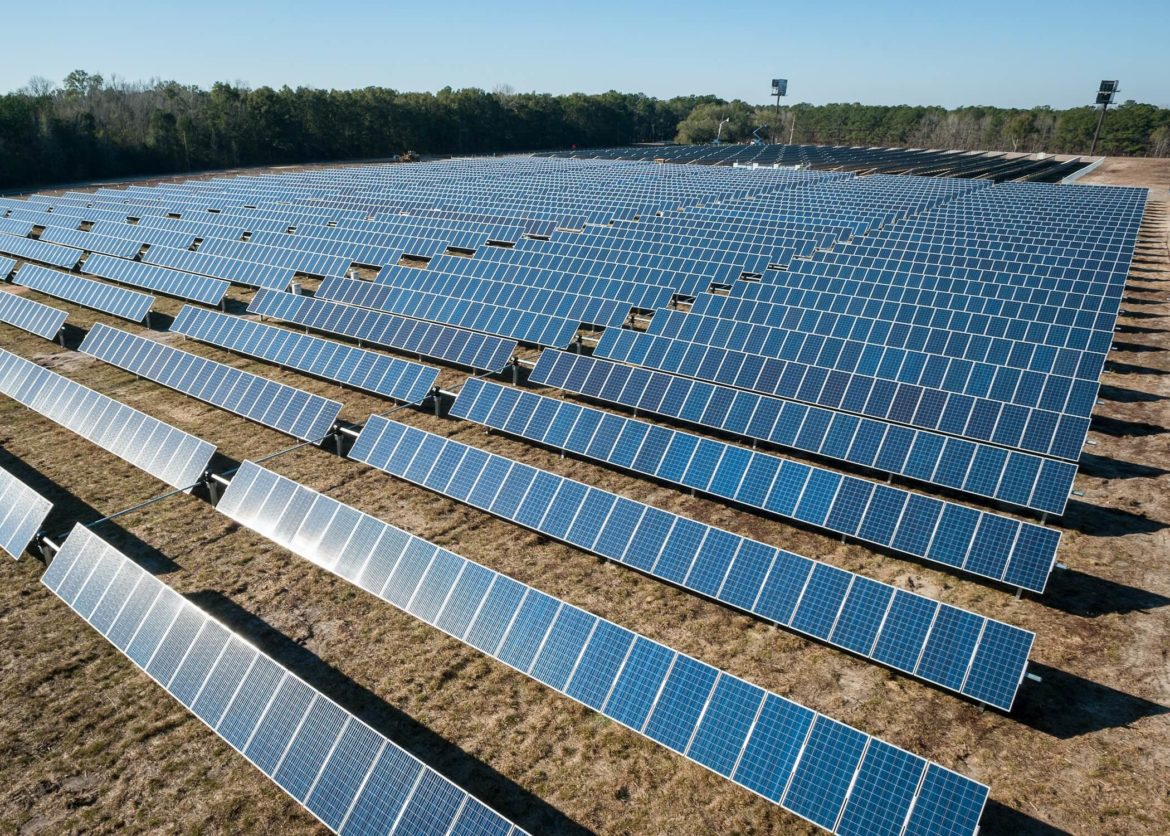

In [8]:
display.Image("../../../99_Media/paneles_solares.jpeg")

En nuestro caso las entidades que tenemos en la granularidad de los datos son:
    
* Ventanas de 15 minutos durante un período de 34 días
* Plantas: son 2
* Inverters: varios por planta
* Sólo un sensor de irradiación por planta
* Sólo un sensor de temperatura ambiente por planta
* Sólo un sensor de temperatura del módulo por planta

Esto condiciona que podremos saber por ejemplo si un inverter de una planta tiene menor rendimiento del esperado, pero no sabremos qué array, panel o módulo lo puede estar causando.

## PREGUNTAS SEMILLA

Habiendo entendido las palancas, kpis y entidades ya podemos plantear las preguntas semilla:

Sobre la irradiación:

* ¿Llega suficiente irradiación todo los días?
* ¿Es similar en ambas plantas?
* ¿Cómo es su distribución por hora?
* ¿Cómo se relaciona con la temperatura ambiente y la temperatura del módulo?

Sobre las plantas:

* ¿Les llega la misma cantidad de irradiación?
* ¿Tienen similar número de inverters?
* ¿Generan similar cantidad de DC?
* ¿Generan similar cantidad de AC?

Sobre la generación de DC:

* ¿Cual es la relación entre irradiación y generación de DC?
* ¿Se ve afectada en algún momento por la temperatura ambiente o del módulo?
* ¿Es similar en ambas plantas?
* ¿Cómo se distribuye a lo largo del día?
* ¿Es constante a lo largo de los días?
* ¿Es constante en todos los inverters?
* ¿Ha habido momentos de fallos?

Sobre la generación de AC:

* ¿Cual es la relación entre DC y generación de AC?
* ¿Es similar en ambas plantas?
* ¿Cómo se distribuye a lo largo del día?
* ¿Es constante a lo largo de los días?
* ¿Es constante en todos los inverters?
* ¿Ha habido momentos de fallos?

Sobre los medidores y sensores:

* ¿Son fiables los datos de irradiación?
* ¿Son fiables los datos de temperatura?
* ¿Son fiables los datos de DC?
* ¿Son fiables los datos de AC?
* ¿Son similares los datos entre ambas plantas?